In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
X = 6 * np.random.rand(100, 1) - 3
y = 0.5 * X**2 + 1.5*X + 2 + np.random.randn(100, 1)

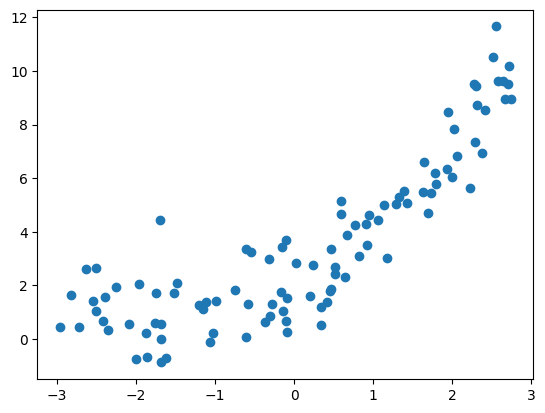

In [4]:
plt.scatter(X,y)

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
## Implementr simple linear regression
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

In [7]:
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)

In [8]:
from sklearn.metrics import r2_score
score = r2_score(y_test, y_pred)
print(f"R^2 score: {score:.2f}")

R^2 score: 0.69


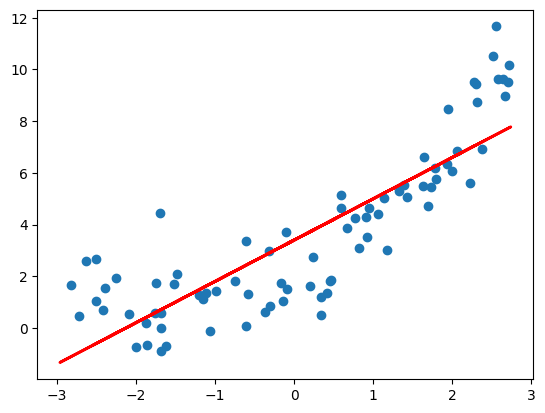

In [10]:
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.scatter(X_train, y_train)

In [11]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2, include_bias=True)

In [12]:
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [14]:
from sklearn.metrics import r2_score
poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train)
y_pred_poly = poly_reg.predict(X_test_poly)


In [16]:
score = r2_score(y_test, y_pred_poly)
print(f"R^2 score: {score:.2f}")

R^2 score: 0.87


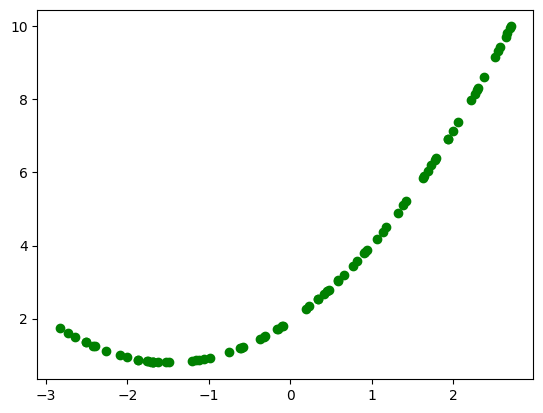

In [ ]:
plt.scatter(X_train, poly_reg.predict(X_train_poly), color='green', label='Poly Train')


In [19]:
## Pipeline for Polynomial Regression
from sklearn.pipeline import Pipeline

In [20]:
def polynomial_regression_pipeline(degree):
    X_new = np.linspace(-3, 3, 200).reshape(200, 1)

    poly_features = PolynomialFeatures(degree=degree, include_bias=True)
    lin_reg = LinearRegression()
    poly_regression = Pipeline([
        ("poly_features", poly_features),
        ("lin_reg", lin_reg)
    ])
    poly_regression.fit(X_train, y_train)
    y_pred_new = poly_regression.predict(X_new)

    plt.plot(X_new, y_pred_new, label=f"Degree {degree}", linewidth=2)
    plt.plot(X_train, y_train, "b.", label="Train Data")
    plt.plot(X_test, y_test, "r.", label="Test Data")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.axis([-4,4,0,10])
    plt.show()


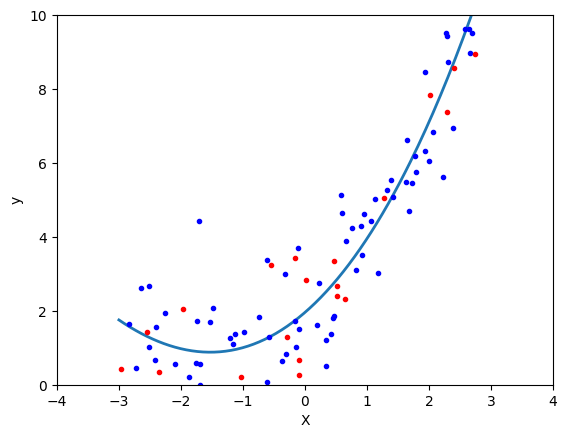

In [28]:
polynomial_regression_pipeline(3)